In [66]:
# Import libraries
import lasio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xlrd
import os
import sys
import welly

In [60]:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_raw_folder = os.path.join(project_root, 'RAW_Data')
data_processed_folder = os.path.join(project_root, 'PROCESSED_Data')
src_folder = os.path.join(project_root, 'mod')
#sys.path.insert(0, src_folder) need to import or install something with alias sys

In [3]:
# To be able to see several outputs at ounce without a need for print statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pd.set_option('display.max_columns', 200)

In [5]:
os.getcwd()

'C:\\Users\\eu1713\\Desktop\\HACKATHON\\notebooks'

# Read Las files from folder

In [17]:
w = pd.read_csv(os.path.join(data_raw_folder, 'list_of_wells.csv'), header = 0)

In [21]:
well_names = w.W.to_list()

In [22]:
# Read LAS files for all wells
lasnames = well_names
LASDF = pd.DataFrame(columns =['MD'])

for i in range(len(lasnames)):
    las = lasio.read(os.path.join(data_raw_folder, 'LAS', lasnames[i]))
    
    lasdf = las.df()
    
    #Create MD column from index
    lasdf['MD'] = lasdf.index
    #las.df().MD = las.df().index

    #Create column with well name
    lasdf['W'] = lasnames[i]
    
    LASDF = pd.merge(LASDF, lasdf, how = 'outer')
LASDF.shape

(3147162, 29)

We have created a dataframe named LASDF that contains all the well logs and a well name column. We save it to csv format.

In [25]:
LASDF.to_csv(os.path.join(data_raw_folder, 'LASDF.csv'))

# Import Las Data

In [ ]:
LASDF = pd.read_csv(os.path.join(data_raw_folder, 'LASDF.csv'), header = 0)

In [23]:
LASDF.head()

,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED,MD,W,PEF,DCAL,BS,DT,SGR,ROP,DTS,MUDWEIGHT,RHOM,THOR,URAN,RMIC,CGR,TGAS
0,NaN,19.406000,-0.708000,NaN,1.789000,64.497482,167.582153,50815100.0,1.574993,0.694700,1.546029,NaN,1.546029,493.493134,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,19.406000,-0.722000,NaN,1.754000,62.406261,167.425064,50761636.0,1.569011,0.445339,1.570030,NaN,1.570030,493.645538,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,19.406000,-0.620000,NaN,1.778000,62.629055,167.808395,50886056.0,1.578010,0.727901,1.594994,NaN,1.594994,493.797943,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.452999,-0.648000,NaN,1.642000,65.998596,169.244873,51314492.0,1.586024,1.474898,1.589930,NaN,1.589930,493.950348,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,19.452999,-0.685000,NaN,1.563000,64.997223,170.635086,51763464.0,1.603011,-0.023000,1.540016,NaN,1.540016,494.102722,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,19.469000,-0.780000,NaN,1.460000,62.685898,170.872452,51832144.0,1.611995,-0.024201,1.553041,NaN,1.553041,494.255127,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,19.469000,-0.753000,NaN,1.521000,60.940327,168.705414,51156364.0,1.608000,-1.023601,1.587050,NaN,1.587050,494.407532,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,19.469000,-0.696000,NaN,1.555000,62.876503,166.633835,50533572.0,1.608009,-1.522700,1.628994,NaN,1.628994,494.559937,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,19.469000,-0.689000,NaN,1.546000,64.122894,164.598587,49901012.0,1.615006,-1.273039,1.623959,NaN,1.623959,494.712341,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,19.469000,-0.693000,NaN,1.519000,62.369705,164.445160,49858040.0,1.620018,-1.303498,1.589999,NaN,1.589999,494.864746,15_9-12.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Subset LAS data

In [13]:
LASDF_ss = pd.read_csv(os.path.join(data_raw_folder, 'LASDF_ss.csv'), header = 0)

In [ ]:
LASDF_ss = LASDF.loc[:, ['LITHOLOGY_GEOLINK','W','CALI', 'DRHO', 'NPHI', 'RHOB', 'GR' ,'DTC', 'RDEP', 'SP', 'RSHA' ,'RMED', 'UWI', 'MD', 'BS']]

In [14]:
LASDF_ss.head()

,Unnamed: 0,LITHOLOGY_GEOLINK,W,CALI,DRHO,NPHI,RHOB,GR,DTC,RDEP,SP,RSHA,RMED,UWI,MD
0,0,NaN,15_9-12.las,19.406000,-0.708,NaN,1.789,64.497482,167.582153,1.574993,0.694700,1.546029,1.546029,NaN,493.493134
1,1,NaN,15_9-12.las,19.406000,-0.722,NaN,1.754,62.406261,167.425064,1.569011,0.445339,1.570030,1.570030,NaN,493.645538
2,2,NaN,15_9-12.las,19.406000,-0.620,NaN,1.778,62.629055,167.808395,1.578010,0.727901,1.594994,1.594994,NaN,493.797943
3,3,NaN,15_9-12.las,19.452999,-0.648,NaN,1.642,65.998596,169.244873,1.586024,1.474898,1.589930,1.589930,NaN,493.950348
4,4,NaN,15_9-12.las,19.452999,-0.685,NaN,1.563,64.997223,170.635086,1.603011,-0.023000,1.540016,1.540016,NaN,494.102722


In [16]:
del LASDF_ss['Unnamed: 0']

In [17]:
LASDF_ss.shape

(3147162, 14)

In [ ]:
# Create well name column by getting rid of .las
LASDF_ss['WN'] = LASDF_ss['W'].apply(lambda x: x[:-4])

In [19]:
# Create a UWI column
LASDF_ss['UWI'] = LASDF_ss['WN']

In [20]:
LASDF_ss.head()

,LITHOLOGY_GEOLINK,W,CALI,DRHO,NPHI,RHOB,GR,DTC,RDEP,SP,RSHA,RMED,UWI,MD,WN
0,NaN,15_9-12.las,19.406000,-0.708,NaN,1.789,64.497482,167.582153,1.574993,0.694700,1.546029,1.546029,15_9-12,493.493134,15_9-12
1,NaN,15_9-12.las,19.406000,-0.722,NaN,1.754,62.406261,167.425064,1.569011,0.445339,1.570030,1.570030,15_9-12,493.645538,15_9-12
2,NaN,15_9-12.las,19.406000,-0.620,NaN,1.778,62.629055,167.808395,1.578010,0.727901,1.594994,1.594994,15_9-12,493.797943,15_9-12
3,NaN,15_9-12.las,19.452999,-0.648,NaN,1.642,65.998596,169.244873,1.586024,1.474898,1.589930,1.589930,15_9-12,493.950348,15_9-12
4,NaN,15_9-12.las,19.452999,-0.685,NaN,1.563,64.997223,170.635086,1.603011,-0.023000,1.540016,1.540016,15_9-12,494.102722,15_9-12


In [21]:
LASDF_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147162 entries, 0 to 3147161
Data columns (total 15 columns):
LITHOLOGY_GEOLINK    float64
W                    object
CALI                 float64
DRHO                 float64
NPHI                 float64
RHOB                 float64
GR                   float64
DTC                  float64
RDEP                 float64
SP                   float64
RSHA                 float64
RMED                 float64
UWI                  object
MD                   float64
WN                   object
dtypes: float64(12), object(3)
memory usage: 360.2+ MB


We have created a subset of the initial LASDF dataframe containing only the logs with most coverage. The subset dataframe is called LASDF_ss.

# Despiked data

In [68]:
#Import despiked data
LASDF_ds = pd.read_csv(os.path.join(data_processed_folder, 'data_despike.csv'))

In [69]:
LASDF_ds.head()

,Unnamed: 0,Unnamed: 0.1,LITHOLOGY_GEOLINK,W,CALI,DRHO,NPHI,RHOB,GR,DTC,RDEP,SP,RSHA,RMED,UWI,MD,NPHI_edit,RHOB_edit,DTC_edit
0,0,0,NaN,15_9-12.las,19.406000,-0.708,NaN,1.789,64.497482,167.582153,1.574993,0.694700,1.546029,1.546029,NaN,493.493134,-1.0,0.448207,64.265168
1,1,1,NaN,15_9-12.las,19.406000,-0.722,NaN,1.754,62.406261,167.425064,1.569011,0.445339,1.570030,1.570030,NaN,493.645538,-1.0,0.448207,64.265168
2,2,2,NaN,15_9-12.las,19.406000,-0.620,NaN,1.778,62.629055,167.808395,1.578010,0.727901,1.594994,1.594994,NaN,493.797943,-1.0,0.448207,64.265168
3,3,3,NaN,15_9-12.las,19.452999,-0.648,NaN,1.642,65.998596,169.244873,1.586024,1.474898,1.589930,1.589930,NaN,493.950348,-1.0,0.448207,64.265168
4,4,4,NaN,15_9-12.las,19.452999,-0.685,NaN,1.563,64.997223,170.635086,1.603011,-0.023000,1.540016,1.540016,NaN,494.102722,-1.0,0.448207,64.265168


In [73]:
LASDF_ds['WN'] = LASDF_ds['W'].apply(lambda x: x[:-4])

In [70]:
LASDF_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9441486 entries, 0 to 9441485
Data columns (total 19 columns):
Unnamed: 0           int64
Unnamed: 0.1         int64
LITHOLOGY_GEOLINK    float64
W                    object
CALI                 float64
DRHO                 float64
NPHI                 float64
RHOB                 float64
GR                   float64
DTC                  float64
RDEP                 float64
SP                   float64
RSHA                 float64
RMED                 float64
UWI                  float64
MD                   float64
NPHI_edit            float64
RHOB_edit            float64
DTC_edit             float64
dtypes: float64(16), int64(2), object(1)
memory usage: 1.3+ GB


In [71]:
del LASDF_ds['Unnamed: 0']
del LASDF_ds['Unnamed: 0.1']

In [74]:
LASDF_ds.head()

,LITHOLOGY_GEOLINK,W,CALI,DRHO,NPHI,RHOB,GR,DTC,RDEP,SP,RSHA,RMED,UWI,MD,NPHI_edit,RHOB_edit,DTC_edit,WN
0,NaN,15_9-12.las,19.406000,-0.708,NaN,1.789,64.497482,167.582153,1.574993,0.694700,1.546029,1.546029,NaN,493.493134,-1.0,0.448207,64.265168,15_9-12
1,NaN,15_9-12.las,19.406000,-0.722,NaN,1.754,62.406261,167.425064,1.569011,0.445339,1.570030,1.570030,NaN,493.645538,-1.0,0.448207,64.265168,15_9-12
2,NaN,15_9-12.las,19.406000,-0.620,NaN,1.778,62.629055,167.808395,1.578010,0.727901,1.594994,1.594994,NaN,493.797943,-1.0,0.448207,64.265168,15_9-12
3,NaN,15_9-12.las,19.452999,-0.648,NaN,1.642,65.998596,169.244873,1.586024,1.474898,1.589930,1.589930,NaN,493.950348,-1.0,0.448207,64.265168,15_9-12
4,NaN,15_9-12.las,19.452999,-0.685,NaN,1.563,64.997223,170.635086,1.603011,-0.023000,1.540016,1.540016,NaN,494.102722,-1.0,0.448207,64.265168,15_9-12


# Data exploration for cleaning

<Figure size 1152x720 with 0 Axes>

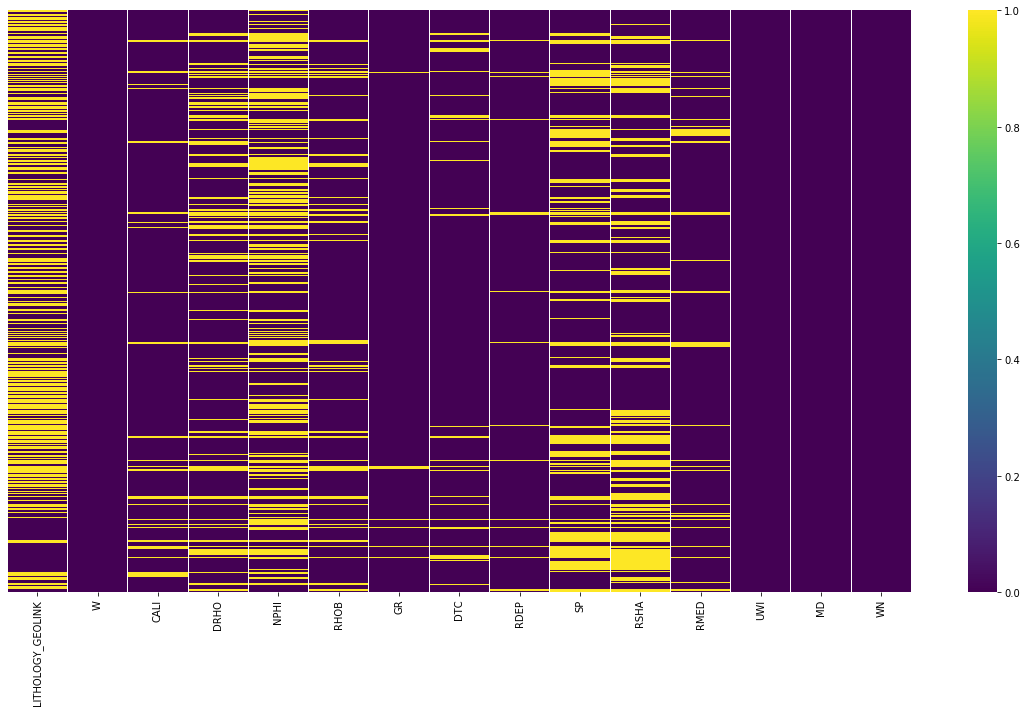

In [22]:
#Visualize nan values in las dataframe
plt.figure(figsize=(16,10))
sns.heatmap(LASDF_ss.isna(), cmap='viridis', yticklabels=False)

plt.tight_layout();
plt.savefig(os.path.join(data_processed_folder, 'figs', 'LASDF_ss_Nan.png'))

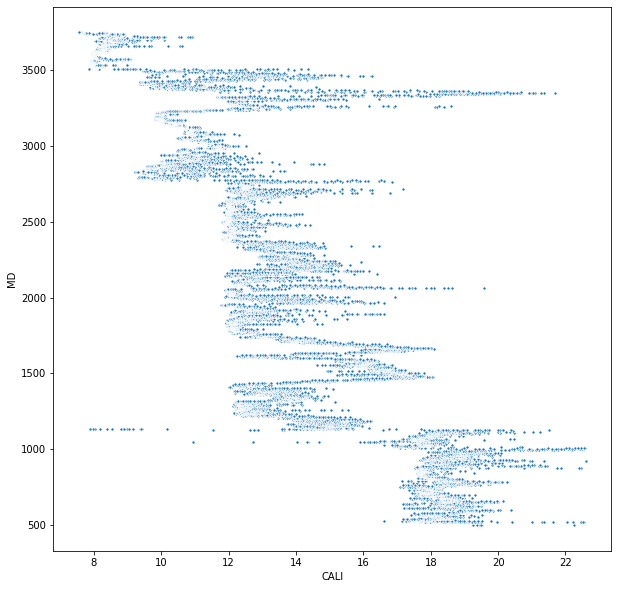

In [408]:
W = LASDF_ss.loc[LASDF_ss['W']== '15_9-12.las']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= W['CALI'], y=W['MD'], data=W, s=10)

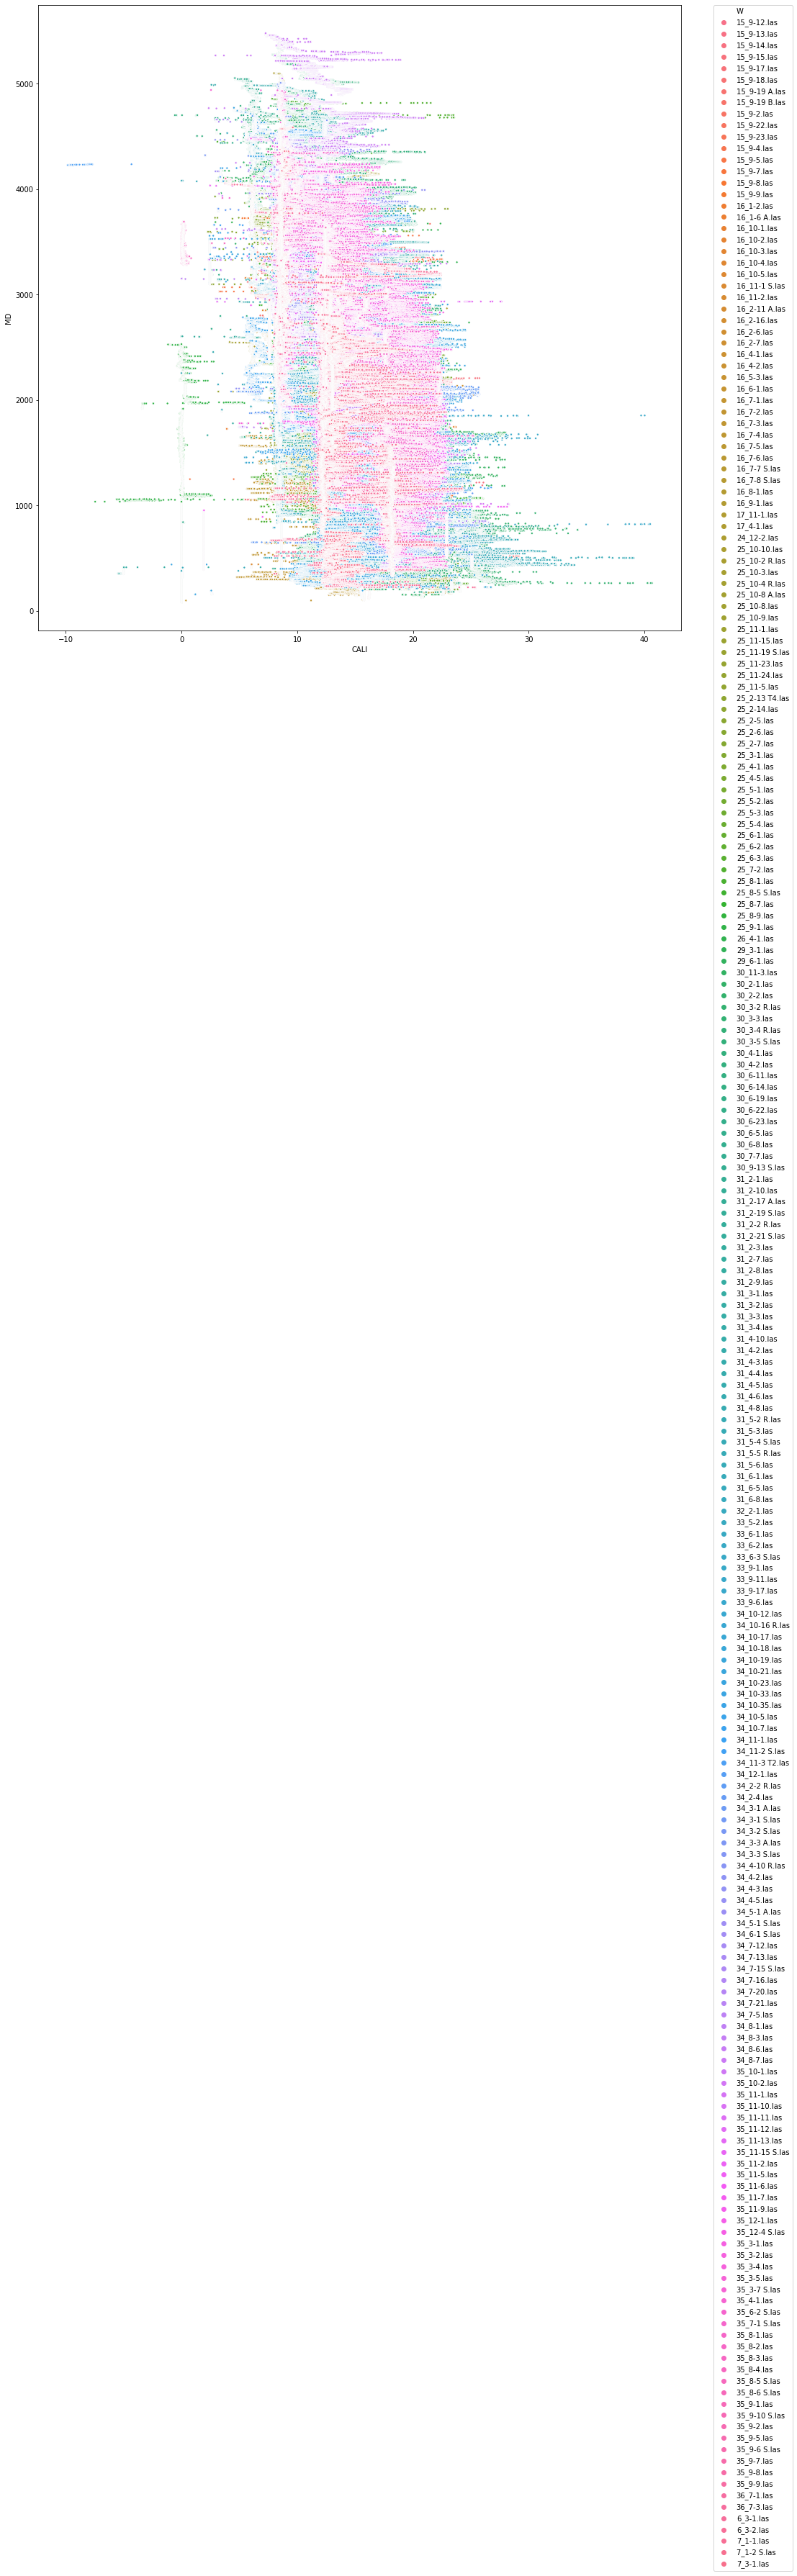

In [413]:
a4_dims = (16, 16)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= LASDF_ss['CALI'], y=LASDF_ss['MD'], data=LASDF_ss, hue = 'W', s=10)

_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(data_processed_folder, 'figs', 'CALI.png'))

In [164]:
# Calculation of mean and variance on rolling windows for all logs
valid_df = LASDF_ss
dfs = [valid_df]
windows = [5*6]
for w in windows:
    win_df = valid_df.rolling(w, win_type='blackmanharris', center = True).mean().rename(lambda n: n+"_meanT{}".format(w), axis='columns')
    dfs.append(win_df)
    
    #win_df = valid_df.rolling(w, win_type='blackmanharris').sum().shift(-w+1).rename(lambda n: n+"_meanL{}".format(w), axis='columns')
    #dfs.append(win_df)
    
for w in windows:
    win_df = valid_df.rolling(w, center=True).var().rename(lambda n: n+"_var{}".format(w), axis='columns')
    dfs.append(win_df)

feature_df = pd.concat(dfs, axis='columns')
feature_df.columns.values

array(['LITHOLOGY_GEOLINK', 'W', 'CALI', 'DRHO', 'NPHI', 'RHOB', 'GR',
       'DTC', 'RDEP', 'SP', 'RSHA', 'RMED', 'UWI', 'MD', 'BS',
       'LITHOLOGY_GEOLINK_meanT30', 'CALI_meanT30', 'DRHO_meanT30',
       'NPHI_meanT30', 'RHOB_meanT30', 'GR_meanT30', 'DTC_meanT30',
       'RDEP_meanT30', 'SP_meanT30', 'RSHA_meanT30', 'RMED_meanT30',
       'UWI_meanT30', 'MD_meanT30', 'BS_meanT30',
       'LITHOLOGY_GEOLINK_var30', 'CALI_var30', 'DRHO_var30',
       'NPHI_var30', 'RHOB_var30', 'GR_var30', 'DTC_var30', 'RDEP_var30',
       'SP_var30', 'RSHA_var30', 'RMED_var30', 'UWI_var30', 'MD_var30',
       'BS_var30'], dtype=object)

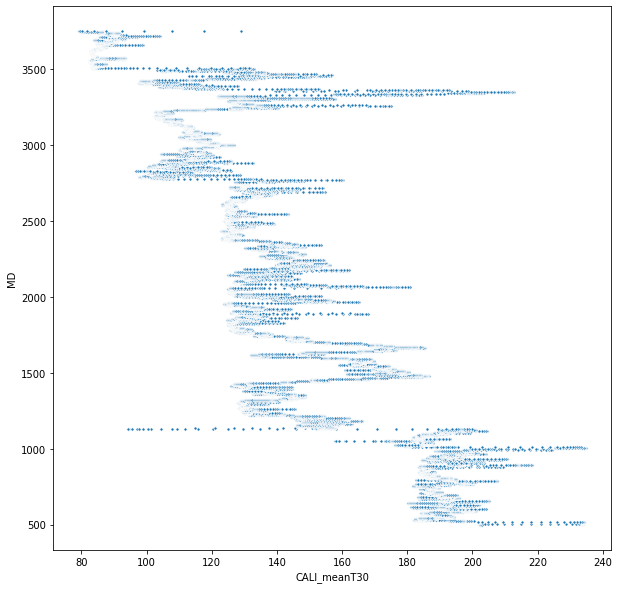

In [76]:
# Mean caliper over window of 1 meter
W = LASDF_w.loc[LASDF_w['W']== '15_9-12.las']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'CALI_meanT6', y='MD', data=W, s=10)

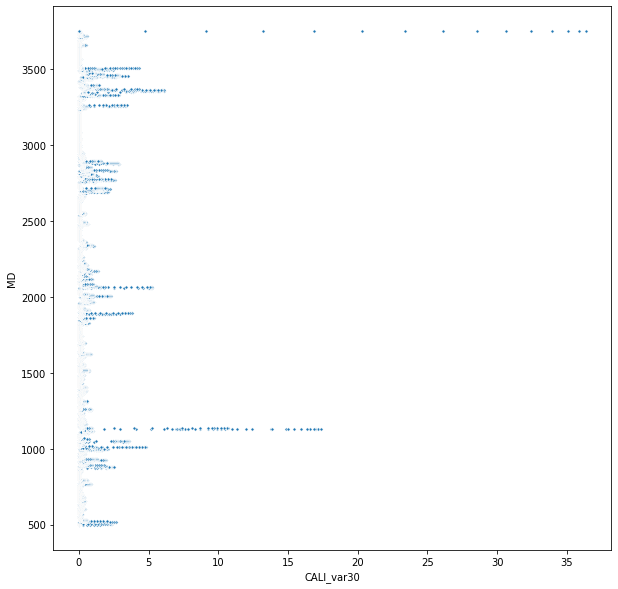

In [165]:
# Variance of caliper over window
LASDF_w = feature_df

W = LASDF_w.loc[LASDF_w['W']== '15_9-12.las']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'CALI_var30', y='MD', data=W, s=10)

C:\Users\eu1713\AppData\Local\Continuum\miniconda3\envs\PESHKA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


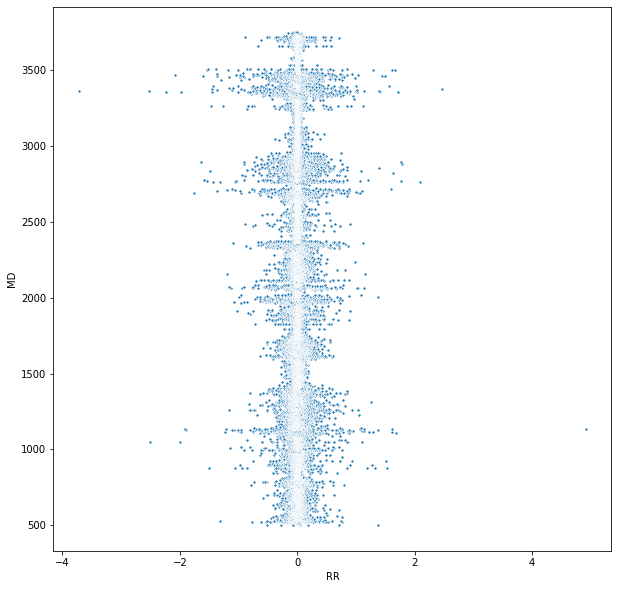

In [257]:
# Residuals of caliper minus averaged caliper over window
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
W["RR"] = W["CALI"]-W["CALI"].rolling(10, win_type="blackmanharris", center=True).mean()
_ = sns.scatterplot(x='RR', y='MD', data=W, s=10)

In [258]:
# Select residuals smaller than 0.5 and bigger than -0.5 
W['CALImod'] = np.nan

W['CALImod']= W.loc[(W['RR']<0.5) &
        (W['RR']>-0.5), 'CALI'].copy()

C:\Users\eu1713\AppData\Local\Continuum\miniconda3\envs\PESHKA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eu1713\AppData\Local\Continuum\miniconda3\envs\PESHKA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


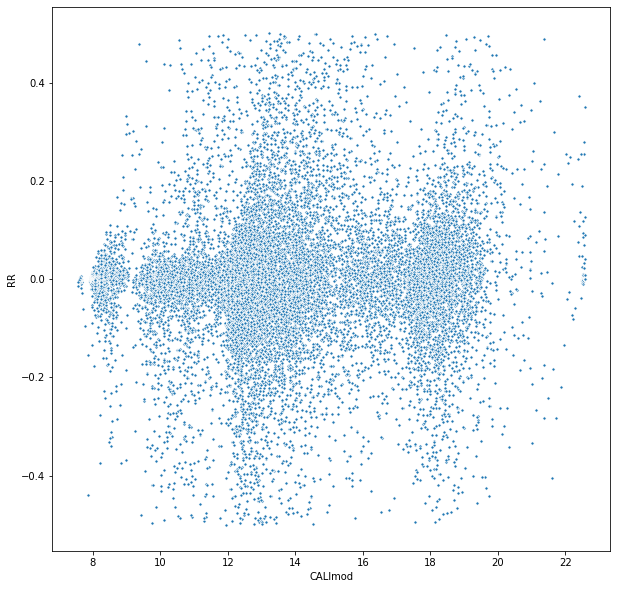

In [259]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'CALImod', y='RR', data=W, s=10)

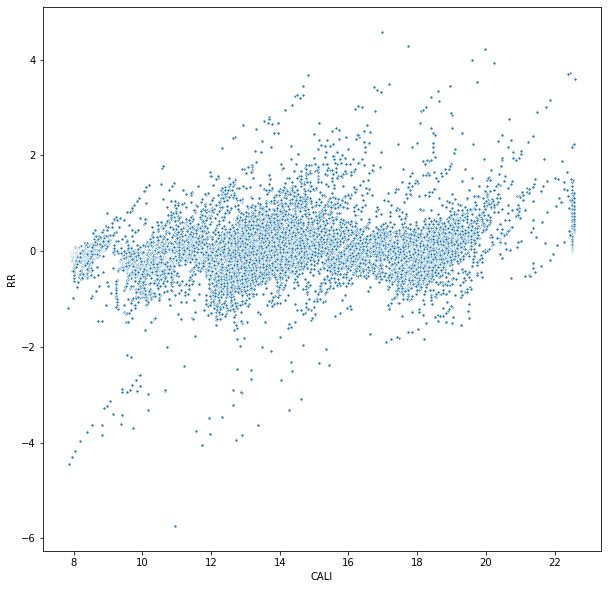

In [249]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'CALI', y='RR', data=W, s=10)

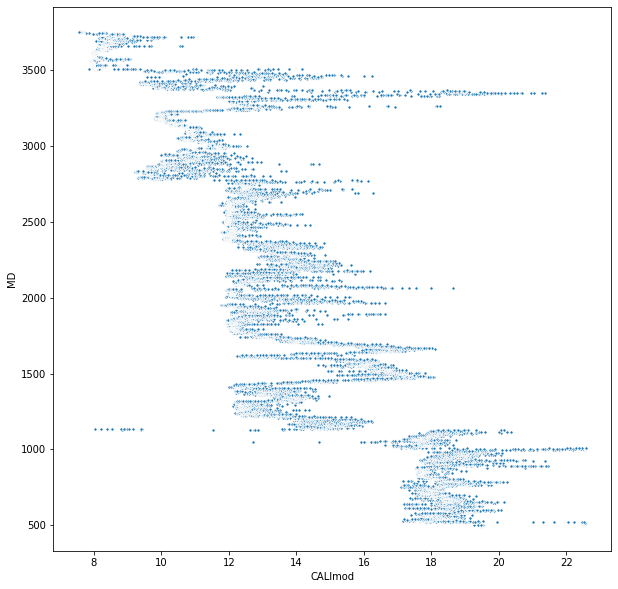

In [260]:
# Plot the modified caliper where high residual values were removed
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'CALImod', y='MD', data=W, s=10)

Tried to clean the caliper by using residuals but failed to find a rolling window that would do a good job from bottom to top of the well. The variation of caliper are sometimes large over a long interval and the residuals calculated for sucessive points might be small. By filtering the caliper by residual value we are still left with lots of bad hole section.

# Import Casing data

Found casing data. This section imports it and extracts the borehole size needed to compare against the caliper.

In [23]:
HSDF = []

F = ['WellboreCasingLOT_1.csv', 'WellboreCasingLOT_2.csv', 'WellboreCasingLOT_3.csv','WellboreCasingLOT_4.csv','WellboreCasingLOT_5.csv','WellboreCasingLOT_6.csv','WellboreCasingLOT_7.csv', 'WellboreCasingLOT_8.csv', 'WellboreCasingLOT_9.csv', 'WellboreCasingLOT_10.csv', 'WellboreCasingLOT_11.csv', 'WellboreCasingLOT_12.csv','WellboreCasingLOT_13.csv', 'WellboreCasingLOT_14.csv', 'WellboreCasingLOT_15.csv', 'WellboreCasingLOT_16.csv']


for i in range(len(F)):
    hs = pd.read_csv(os.path.join(data_raw_folder, 'csv', F[i]))
  
    HSDF.append(hs)
    
HSDF = pd.concat(HSDF, sort = False)    

In [24]:
HSDF.head()

,URI,Wlb Name,Wlb Casing Type,Wlb Casing Depth,Wlb Casing Diameter,Wlb Hole Depth,Wlb Hole Diameter,Wlb Lot Mud Dencity,Datesync NPD
0,https://member.diskos.cgg.com:443/whereoil-dat...,1/2-1,LINER,3569.0,7,3576.0,8 1/2,0.00,15-09-2019
1,https://member.diskos.cgg.com:443/whereoil-dat...,1/2-1,INTERM.,3052.0,9 5/8,3056.0,12 1/4,1.88,15-09-2019
2,https://member.diskos.cgg.com:443/whereoil-dat...,1/2-1,INTERM.,1524.0,13 3/8,1531.0,17 1/2,1.82,15-09-2019
3,https://member.diskos.cgg.com:443/whereoil-dat...,1/2-1,INTERM.,645.0,20,648.0,26,1.69,15-09-2019
4,https://member.diskos.cgg.com:443/whereoil-dat...,1/2-1,CONDUCTOR,170.0,30,171.0,36,0.00,15-09-2019


In [25]:
#Clean well name
HSDF['Wlb Name'] = HSDF['Wlb Name'].apply(lambda x: str(x).replace('/','_'))

In [26]:
HSDF['Wlb Hole Diameter'].unique()

array(['8 1/2', '12 1/4', '17 1/2', '26', '36', '24', '6', '12 1/2',
       '6 1/4', '9 7/8', '16', '22', nan, '19 1/2', '44', '8 3/8',
       '5 7/8', '20', '5 2/3', '30', '6 1/2', '32', '42', '12 174', '38',
       '8 1/8', '8', '9 1/2', '7 5/8', '28', '5 3/4', '12', '10 5/8',
       '18 1/2', '15', '18', '8  1/2', '5 3/8', '12 1/8', '17 1/4',
       '28 3/4', '9 5/8', '36 1/4', '15 3/4', '4 1/2', '19 3/4', '17',
       '40', '14 3/4', '14', '14 1/2', '14 7/8', '7', '27', '42x36', '25',
       '18 3/4', '21', '48'], dtype=object)

In [27]:
#map borehole size to numbers
dicths = {'8 1/2': 8.5, '12 1/4': 12.25, '17 1/2': 17.5, '26': 26, '36': 36, '24':24, '6':6, '12 1/2': 12.5,
       '6 1/4': 6.25, '9 7/8': 9.875, '16': 16, '22':22, '19 1/2': 19.5, '44':44, '8 3/8': 8.375,
       '5 7/8': 5.875, '20':20, '5 2/3': 5.66, '30':30, '6 1/2': 6.5, '32':32, '42':42, '21':21, '48':48, '12 174': 12.25, '38': 38,
       '8 1/8': 8.125, '8':8, '9 1/2': 9.5, '7 5/8': 7.625, '28': 28, '5 3/4': 5.75, '12': 12, '10 5/8': 10.625,
       '18 1/2':18.5, '15':15, '18':18, '8  1/2': 8.5, '5 3/8': 5.375, '12 1/8': 18.125, '17 1/4': 17.25,
       '28 3/4': 28.75, '9 5/8': 9.625 , '36 1/4': 36.25, '15 3/4': 15.75, '4 1/2': 4.5, '19 3/4': 19.75, '17':17,
       '40':40, '14 3/4':14.75, '14':14, '14 1/2':14.5, '14 7/8': 14.875, '7':7, '27':27, '42x36': np.nan, '25':25}

HSDF['HoleD'] = HSDF['Wlb Hole Diameter'].map(dicths)

In [28]:
HSDF.head()

,URI,Wlb Name,Wlb Casing Type,Wlb Casing Depth,Wlb Casing Diameter,Wlb Hole Depth,Wlb Hole Diameter,Wlb Lot Mud Dencity,Datesync NPD,HoleD
0,https://member.diskos.cgg.com:443/whereoil-dat...,1_2-1,LINER,3569.0,7,3576.0,8 1/2,0.00,15-09-2019,8.50
1,https://member.diskos.cgg.com:443/whereoil-dat...,1_2-1,INTERM.,3052.0,9 5/8,3056.0,12 1/4,1.88,15-09-2019,12.25
2,https://member.diskos.cgg.com:443/whereoil-dat...,1_2-1,INTERM.,1524.0,13 3/8,1531.0,17 1/2,1.82,15-09-2019,17.50
3,https://member.diskos.cgg.com:443/whereoil-dat...,1_2-1,INTERM.,645.0,20,648.0,26,1.69,15-09-2019,26.00
4,https://member.diskos.cgg.com:443/whereoil-dat...,1_2-1,CONDUCTOR,170.0,30,171.0,36,0.00,15-09-2019,36.00


In [29]:
HSDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8780 entries, 0 to 4
Data columns (total 10 columns):
URI                    7506 non-null object
Wlb Name               8780 non-null object
Wlb Casing Type        8693 non-null object
Wlb Casing Depth       8780 non-null float64
Wlb Casing Diameter    7055 non-null object
Wlb Hole Depth         8780 non-null float64
Wlb Hole Diameter      8681 non-null object
Wlb Lot Mud Dencity    8780 non-null float64
Datesync NPD           8780 non-null object
HoleD                  8679 non-null float64
dtypes: float64(4), object(6)
memory usage: 754.5+ KB


In [30]:
#number of wells in LAS
len(LASDF_ss['WN'].unique())

223

In [31]:
#number of wells in LAS that have casing data
names_wells_casing= HSDF['Wlb Name'].unique() 

WELLS_WITH_CASING = LASDF_ss.loc[LASDF_ss['WN'].isin(names_wells_casing)]

print(len(WELLS_WITH_CASING['WN'].unique()))

213


In [32]:
# number of wells with no casing values
223-213

10

In [33]:
# name of wells with no casing
print(LASDF_ss.loc[~LASDF_ss['WN'].isin(names_wells_casing)]['WN'].unique())

['25_2-13 T4' '30_3-4 R' '31_5-2 R' '31_5-5 R' '34_10-16 R' '34_11-3 T2'
 '6_3-1' '6_3-2' '7_1-1' '7_3-1']


# Create Bad hole flag

In [34]:
# Add to LASDF_ss a column with bore hole size: BS

LASDF_ss['BS']=np.nan

for well in LASDF_ss['WN'].unique():
    #dataframe containing well log data
    df = LASDF_ss.loc[LASDF_ss['WN']== well].sort_values('MD', ascending =True)
    
    #dataframe containing casing data
    hd = (HSDF.loc[HSDF['Wlb Name'] == well, ['Wlb Hole Depth','HoleD', 'Wlb Name']]).sort_values("Wlb Hole Depth", ascending=True)
    
    
    for i in range(1, len(hd)):
    
        # select the well log dataframe where the depth value is greater than or equal to 
        #the depth of each bore hole size
        x = df.loc[(df['MD']>=hd.values[i-1][0])].copy()      
        
        #Fill the BS column
        x['BS'] = hd.values[i][1]
        
        # Fill the Well log dataframe
        LASDF_ss.loc[x.index, 'BS'] = x.loc[:,'BS']
    

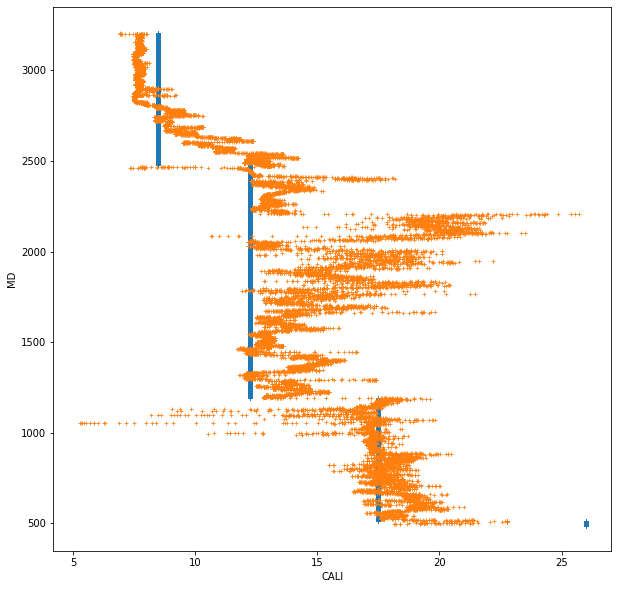

In [35]:
# Plot BS and caliper for one well
W = LASDF_ss.loc[LASDF_ss['WN'] == '15_9-15']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'BS', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'CALI_well.png'))

In [36]:
# Create borehole quality flag. If caliper is more than 30% than borehole size value than label as bad hole.
LASDF_ss['Bflag'] = LASDF_ss.apply(lambda x: 1 if x['CALI'] > 1.3* x['BS'] else 0, axis =1)

In [79]:
# Tried to apply BS flag on despiked data but an error came
LASDF_ds['Bflag'] = LASDF_ds.apply(lambda x: 1 if x['CALI'] > 1.3* x['BS'] else 0, axis =1)

MemoryError: occurred at index 9058660

In [37]:
# Create borehole quality flag. If caliper is more less than 30% than borehole size value than label as bad hole.
LASDF_ss['Bflag_s'] = LASDF_ss.apply(lambda x: 1 if x['CALI'] < 0.7* x['BS'] else 0, axis =1)

In [38]:
# Combine the borehole flags
LASDF_ss['BF'] = LASDF_ss['Bflag'] + LASDF_ss['Bflag_s']

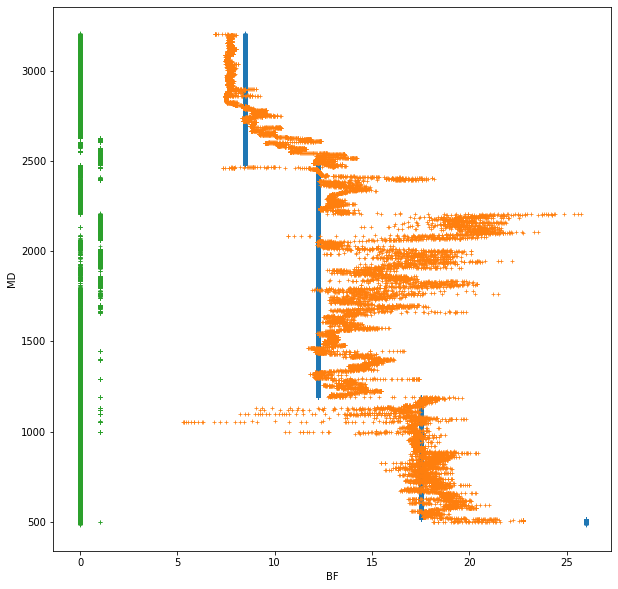

In [45]:
# Plot borehole flag, borehole size and caliper
W = LASDF_ss.loc[LASDF_ss['WN'] == '15_9-15']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'BS', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'CALI_well_flag.png'))

## Data export

In [474]:
x = LASDF_ss.loc[:, ['BF','CALI', 'BS', 'MD', 'WN']]

x.to_csv(os.path.join(data_processed_folder, 'LASDF_CALI_FLAG.csv'))

## Create subset of LASDF_ss, with bad hole removed

In [40]:
LASDF_noBH = LASDF_ss.loc[LASDF_ss['BF'] != 1]

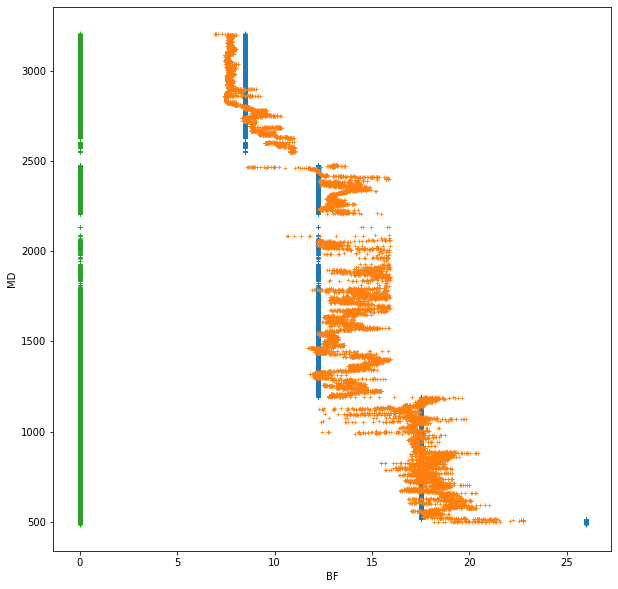

In [46]:
W = LASDF_noBH.loc[LASDF_noBH['WN'] == '15_9-15']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'BS', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'CALI_well_flag_rm.png'))

## Keep data only where Lithology is defined

In [50]:
LASDF_noBH_R = LASDF_noBH.loc[~LASDF_noBH['LITHOLOGY_GEOLINK'].isna()]

<Figure size 1152x720 with 0 Axes>

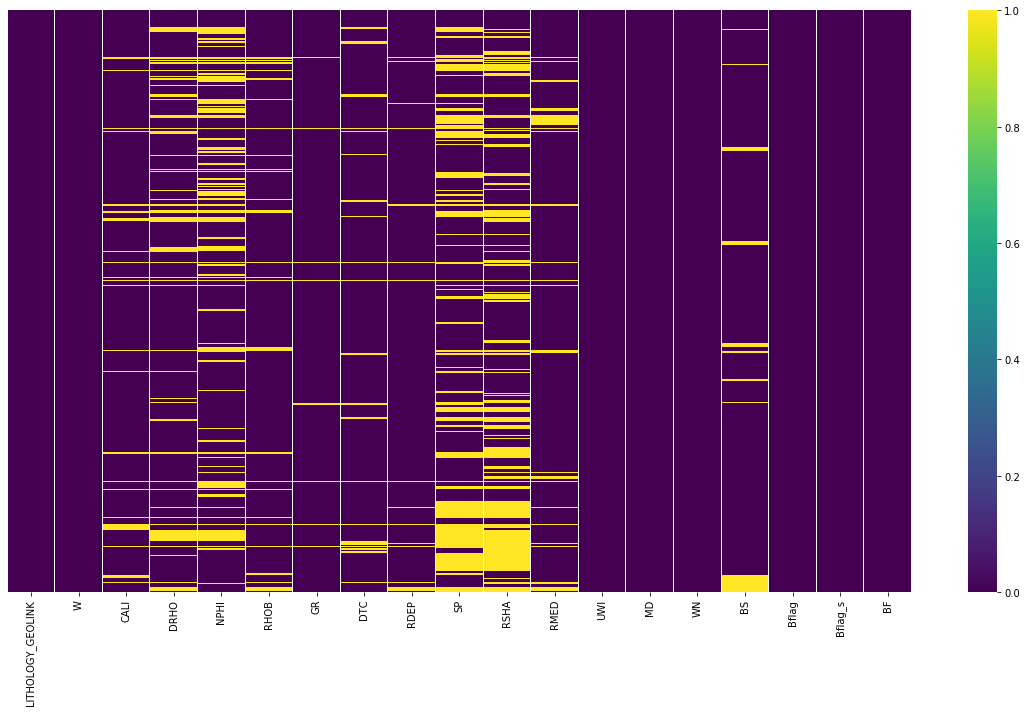

In [54]:
#Visualize nan values in las dataframe
plt.figure(figsize=(16,10))
sns.heatmap(LASDF_noBH_R.isna(), cmap='viridis', yticklabels=False)

plt.tight_layout();
plt.savefig(os.path.join(data_processed_folder, 'figs', 'LASDF_noBH_R.png'))

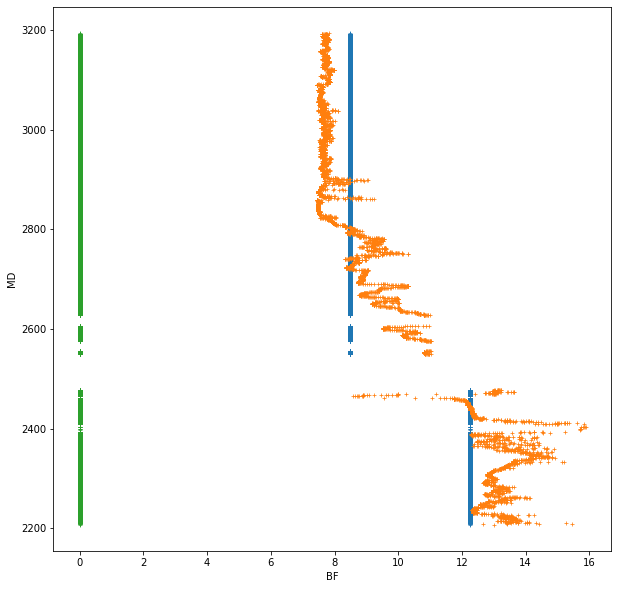

In [53]:
W = LASDF_noBH_R.loc[LASDF_noBH['WN'] == '15_9-15']

a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'BS', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'CALI_well_flag_RES.png'))

In [64]:
LASDF_noBH_R.to_csv(os.path.join(data_processed_folder, 'LASDF_CALI_FLAG_RES_desp.csv'))

## Flag rocks of interest: sand, oil sands

In [80]:
LASDF_noBH_R.head()

,LITHOLOGY_GEOLINK,W,CALI,DRHO,NPHI,RHOB,GR,DTC,RDEP,SP,RSHA,RMED,UWI,MD,WN,BS,Bflag,Bflag_s,BF
11302,6.0,15_9-12.las,14.438001,0.010,0.447725,2.363,60.285748,134.253601,0.737006,50.570400,0.785088,0.785088,15_9-12,2215.917725,15_9-12,12.25,0,0,0
11303,6.0,15_9-12.las,14.633000,0.006,0.432095,2.340,63.250000,129.101868,0.741000,50.820000,0.840000,0.840000,15_9-12,2216.070068,15_9-12,12.25,0,0,0
11304,6.0,15_9-12.las,14.813001,0.006,0.410166,2.314,61.405998,122.476944,0.752000,50.820000,0.858000,0.858000,15_9-12,2216.222412,15_9-12,12.25,0,0,0
11305,6.0,15_9-12.las,14.383001,-0.001,0.414143,2.293,62.561596,116.908607,0.739962,51.070000,0.857046,0.857046,15_9-12,2216.375000,15_9-12,12.25,0,0,0
11306,6.0,15_9-12.las,14.202999,0.001,0.439923,2.275,61.691055,115.390953,0.715966,51.070602,0.886082,0.886082,15_9-12,2216.527344,15_9-12,12.25,0,0,0


In [89]:
R = LASDF_noBH_R.loc[ (LASDF_noBH_R['WN'] == '31_2-1') |
                     (LASDF_noBH_R['WN'] == '31_2-10') |
                     (LASDF_noBH_R['WN'] == '31_2-3') |
                     (LASDF_noBH_R['WN'] ==  '31_2-7') |
                     (LASDF_noBH_R['WN'] ==  '31_2-8') |
                     (LASDF_noBH_R['WN'] ==  '31_2-9')
                     ]

In [90]:
# Create column with velocity
R['VEL'] = 1/R['DTC']

C:\Users\eu1713\AppData\Local\Continuum\miniconda3\envs\PESHKA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
# Create Sand flag
R['SAND']= R.loc[(R['GR']< 50)&
            (R['DTC']< 50 ) &
            (R['DTC']> 14.28) &
            (R['RHOB']> 2.3) &
            (R['RHOB']< 2.5)]

In [ ]:
# Create sand flag
R['SAND'] = R.apply(lambda x: 1 if (x['GR'] <  50) & (x['RHOB']> 2.0) &
            (x['RHOB']< 2.7) else 0, axis =1)

In [108]:
# Create oil sand flag
R['OIL_SAND'] = R.apply(lambda x: 1 if (x['GR'] <  50) & (x['RHOB']> 2.0) &
            (x['RHOB']< 2.7) & (x['RDEP']>50) else 0, axis =1)

C:\Users\eu1713\AppData\Local\Continuum\miniconda3\envs\PESHKA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


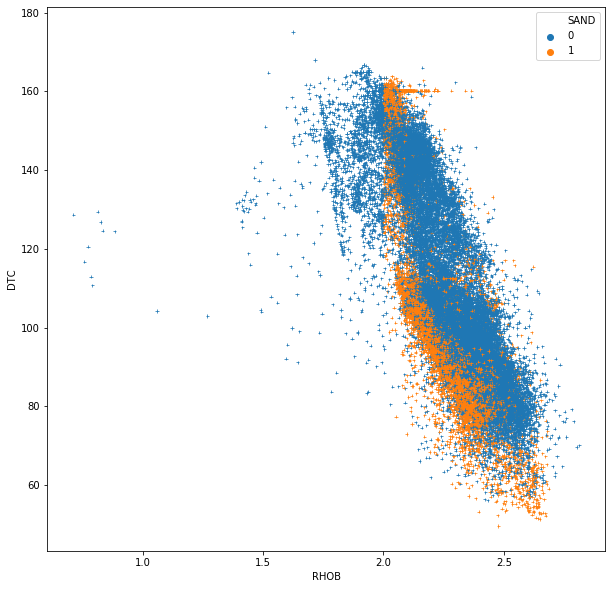

In [114]:
# Plot densityy versus sonic colored by sand flag
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'RHOB', y='DTC', data=R, hue= 'SAND', s=10, marker = '+')
#_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
#_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'RHO_RES.png'))

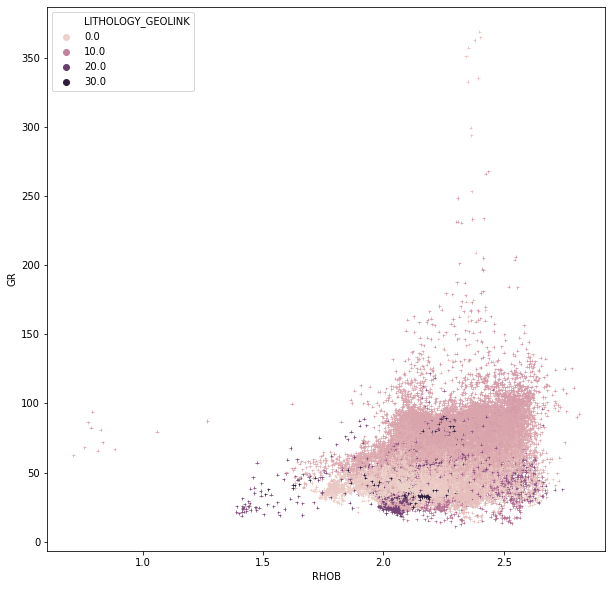

In [100]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'RHOB', y='GR', data=R, hue= 'LITHOLOGY_GEOLINK', s=10, marker = '+')
#_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
#_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'RHO_RES_1.png'))

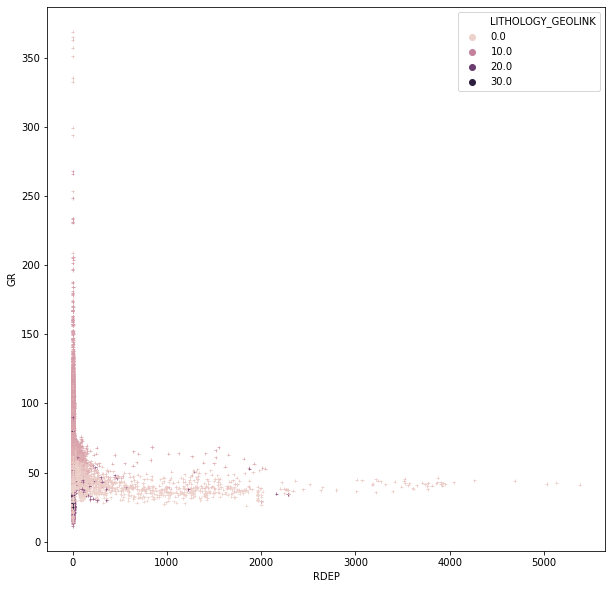

In [106]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'RDEP', y='GR', data=R, hue= 'LITHOLOGY_GEOLINK', s=10, marker = '+')
#_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
#_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'RHO_RES_2.png'))

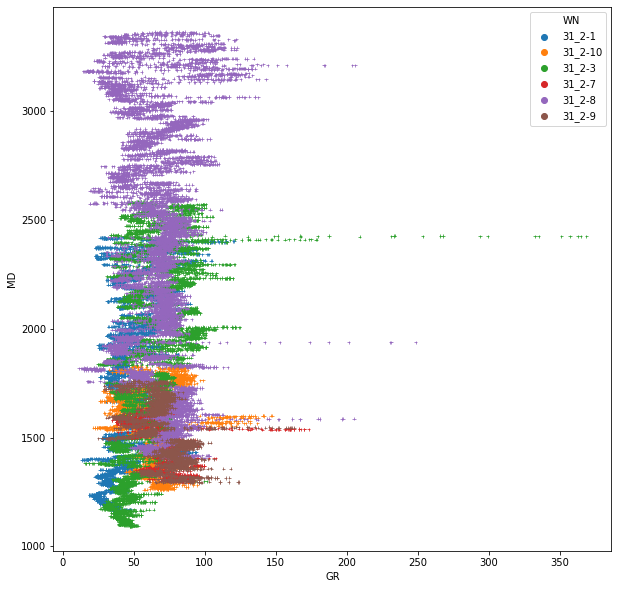

In [93]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'GR', y='MD', data=R, hue= 'WN', s=10, marker = '+')
#_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
#_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'GR_RES.png'))

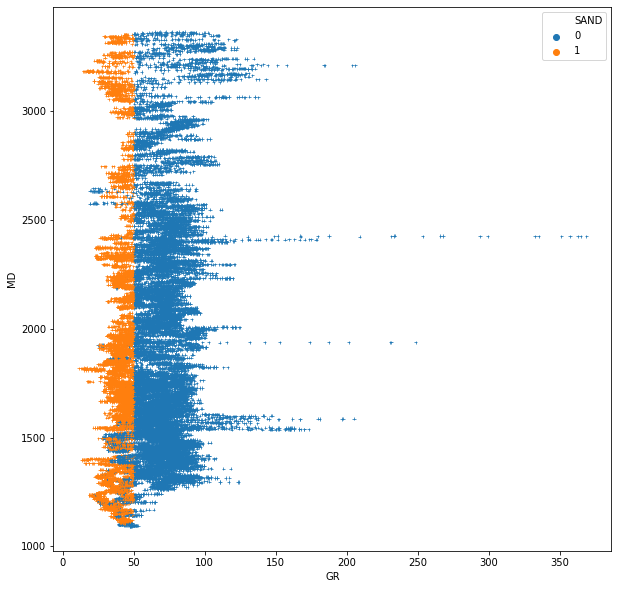

In [104]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'GR', y='MD', data=R, hue= 'SAND', s=10, marker = '+')
#_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
#_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'GR_RES_1.png'))

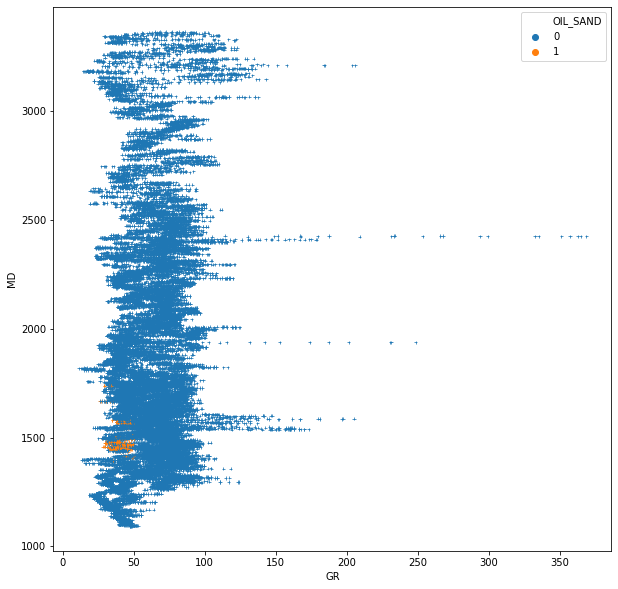

In [109]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.scatterplot(x= 'GR', y='MD', data=R, hue= 'OIL_SAND', s=10, marker = '+')
#_ = sns.scatterplot(x= 'CALI', y='MD', data=W, s=10, marker = '+')
#_ = sns.scatterplot(x= 'BF', y='MD', data=W, s=10, marker = '+')

plt.savefig(os.path.join(data_processed_folder, 'figs', 'GR_RES_2.png'))

In [98]:
R.head()

,LITHOLOGY_GEOLINK,W,CALI,DRHO,NPHI,RHOB,GR,DTC,RDEP,SP,RSHA,RMED,UWI,MD,WN,BS,Bflag,Bflag_s,BF,VEL,SAND
1505987,16.0,31_2-1.las,17.656111,0.002692,0.521994,2.197520,39.590191,116.899002,1.586334,38.324291,1.583534,1.583534,31_2-1,1165.021851,31_2-1,17.5,0,0,0,0.008554,1
1505988,16.0,31_2-1.las,17.666201,-0.003227,0.509399,2.240210,38.371479,112.123711,1.518930,37.984882,1.821768,1.821768,31_2-1,1165.174194,31_2-1,17.5,0,0,0,0.008919,1
1505989,16.0,31_2-1.las,17.662781,-0.001462,0.507634,2.251451,37.278530,117.026901,1.476590,37.937263,1.822032,1.822032,31_2-1,1165.326660,31_2-1,17.5,0,0,0,0.008545,1
1505990,16.0,31_2-1.las,17.645300,0.003227,0.535825,2.211232,37.325272,127.051697,1.434308,37.793674,1.613198,1.613198,31_2-1,1165.479004,31_2-1,17.5,0,0,0,0.007871,1
1505991,16.0,31_2-1.las,17.640711,0.009077,0.568495,2.124125,38.248112,137.862503,1.392006,36.997162,1.368465,1.368465,31_2-1,1165.631470,31_2-1,17.5,0,0,0,0.007254,1


Save the data to csv

In [105]:
R.to_csv(os.path.join(data_processed_folder, 'AWESOME_SAND.csv'))

In [110]:
R.to_csv(os.path.join(data_processed_folder, 'AWESOME_OILSAND.csv'))